In [1]:
import numpy as np
import pandas as pd

from keggx import KEGG

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Create KEGG object

In [2]:
pathway = KEGG(pathway_id='hsa05142')

### Simulate gene expression

In [3]:
# Get genes in KEGG pathway
genes = pathway.node_attributes_df[pathway.node_attributes_df['type'] == 'gene']['name'].unique()
# Simulate RNA values
rna = pd.Series(data=np.random.normal(size=len(genes)), index=genes)
rna.head()

TLR2    1.356642
TLR4    0.836917
IFNG   -0.763642
CALR    1.827007
C3     -0.027235
dtype: float64

### Visualize

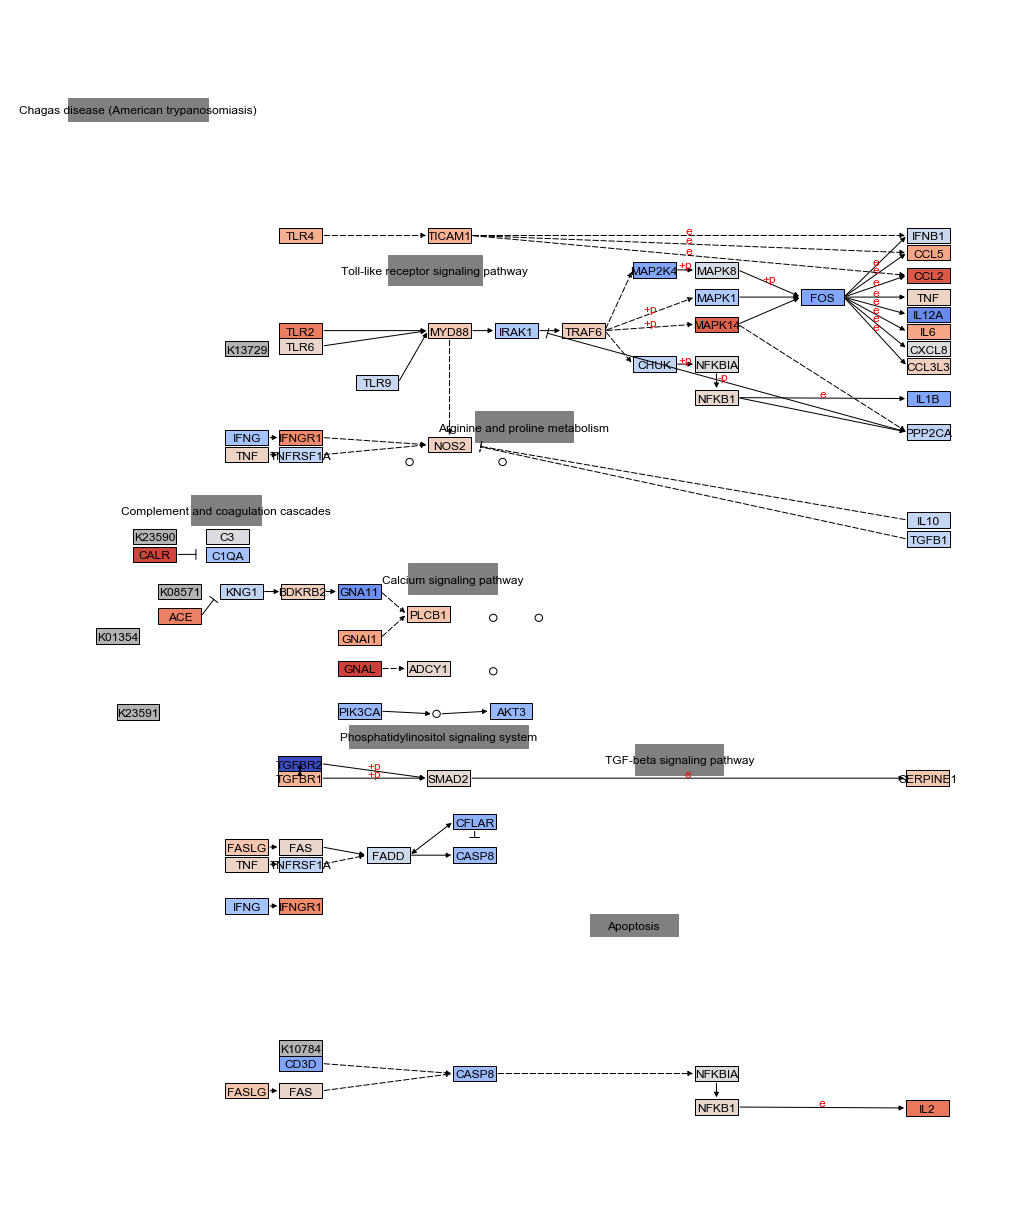

In [4]:
fig, ax = pathway.view(scale=2, show_compounds=False, gene_values=rna)